### Object Recognition via Template Matching

#### Step 1: Imports

In [83]:
# Template matching finding a face in an image
#-------------------------------------------------
# To install OpenCV-Python:
#    - https://pypi.org/project/opencv-python/
#-------------------------------------------------
# pip install opencv-python
#-------------------------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# importing os module  
import os 

# Use %matplotlib notebook to get zoom-able & resize-able notebook. 
# - This is the best for quick tests where you need to work interactively.
%matplotlib notebook

#### Step 2: Testing the environment

In [84]:
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)

# Testinng the numpy version
print("Numpy : ",np.__version__)

OpenCV :  4.5.1
Numpy :  1.19.2


#### Step 3: Input data:

In [86]:
#----------------------------------------------------
# The input images
#----------------------------------------------------
# - The target image name
#----------------------------------------------------
# She was the first woman of indian origin in Space
# In 2003, Chawla was one of the seven crew members who died in the Space Shuttle Columbia disaster
# https://en.wikipedia.org/wiki/Kalpana_Chawla
#----------------------------------------------------
# the template image name
target_name = "Kalpana Chawla" 
# template image file name
template_img_file_path = "../data/test-images-03/right_cat.jpg"
# check if the template image file exists
if(os.path.exists(template_img_file_path) == 0):
    print('Template image file name DOES NOT EXIST! = ' + template_img_file_path)
print("-------------------------------------------------------")
print("Step 1: Read the input template image: {0}".format(template_img_file_path))
print("-------------------------------------------------------")
# Read the template of the image of the target image
template_img = cv2.imread(template_img_file_path, cv2.IMREAD_COLOR)
# create a figure and set its axis
fig_size = (3, 2)
plt.figure(figsize=fig_size)
# axis off
plt.axis('off')
# display the input image
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
# set the title
plt.title('Template image')
# show the image
plt.show()                    
# check the shape of the template image
template_img_width, template_img_height, template_img_depth = template_img.shape
# display a message
print("Template image read successfully!")
print("- Its size:  (height = {0}, width = {2}, depth = {2})".format(template_img_width, template_img_height, template_img_depth))
# convert to grayscale if it is RGB
if ( template_img_depth == 3):
    template_img_gray = cv2.cvtColor(template_img,cv2.COLOR_RGB2GRAY)
else:
    template_img_gray = template_img
# display a message
print("Template image converted to grayscale")

Template image file name DOES NOT EXIST! = ../data/test-images-03/right_cat.jpg
-------------------------------------------------------
Step 1: Read the input template image: ../data/test-images-03/right_cat.jpg
-------------------------------------------------------


<IPython.core.display.Javascript object>

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


-------------------------------------------------------
Step 2: Read the input reference image: ../data/test-images-03/412945-two-kittensl.jpg
-------------------------------------------------------


<IPython.core.display.Javascript object>


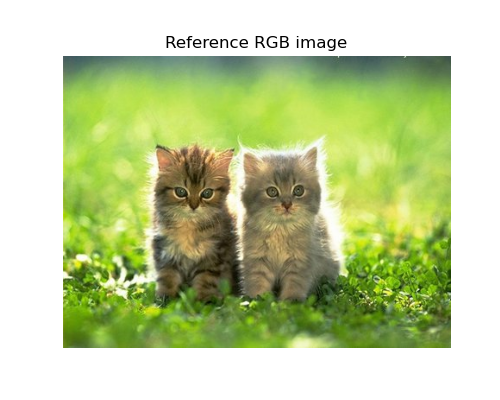

Reference image read successfully!
- Its size: (height = 338, width = 3, depth = 3)
Reference image converted to grayscale


In [87]:
#----------------------------------------------------
# Read the reference image
#----------------------------------------------------
# Reading the reference of the image
#----------------------------------------------------
# reference image file name
reference_img_file_path = "../data/test-images-03/412945-two-kittensl.jpg"
# check if the reference image file exists
if(os.path.exists(reference_img_file_path) == 0):
    print('Reference image file name DOES NOT EXIST! = ' + reference_img_file_path)
print("-------------------------------------------------------")
print("Step 2: Read the input reference image: {0}".format(reference_img_file_path))
print("-------------------------------------------------------")
# Read the reference image
reference_img = cv2.imread(reference_img_file_path, cv2.IMREAD_COLOR)
# create a figure and set its axis
fig_size = (5, 4)
plt.figure(figsize=fig_size)
# axis off
plt.axis('off')
# display the input image
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
# set the title
plt.title('Reference RGB image')
# show the image
plt.show()                    
# check the shape of the template image
reference_img_width, reference_img_height, reference_img_depth = reference_img.shape
# display a message
print("Reference image read successfully!")
print("- Its size: (height = {0}, width = {2}, depth = {2})".format(reference_img_width, reference_img_height, reference_img_depth))
# convert to grayscale if it is RGB
if ( reference_img_depth == 3):
    reference_img_gray = cv2.cvtColor(reference_img,cv2.COLOR_RGB2GRAY)
else:
    reference_img_gray = reference_img
# display a message
print("Reference image converted to grayscale")

#### Step 3: Apply Template Matching

In [88]:
#converting the images to uint8 type
# - the template image in gryscale
template_img_gray = np.uint8(template_img_gray)
# - the reference image in gryscale
reference_img_gray = np.uint8(reference_img_gray)

# performing the actual template matching on the image
results = cv2.matchTemplate(reference_img_gray,template_img_gray,cv2.TM_CCOEFF_NORMED)


#### Step 4: Calculate the Bounding-Boxes of the detected templates

In [89]:
# calculating the bounds of the template to be plotted in the next step
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(results)

top_left = max_loc
bottom_right = (top_left[0] + template_img_height, top_left[1] + template_img_width)

threshhold = 0.99
x_locs, y_locs = np.where( results >= threshhold)
# the number of detected templates
num_detected_templates = x_locs.shape[0]
# display a message
print("The number of detected templates = {0}".format(num_detected_templates))

The number of detected templates = 1


#### Step 4: Calculate the Bounding-Boxes of the detected templates

<IPython.core.display.Javascript object>


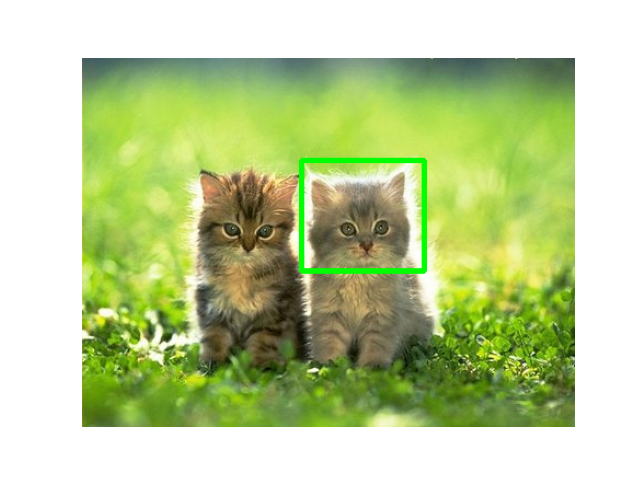

(-0.5, 449.5, 337.5, -0.5)

In [90]:
# rendering the boundary and the description for the template
# cv2.putText(reference_img, "Found {0}".format(target_name),top_left, cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8 ,(255, 255, 255), 1);
cv2.rectangle(reference_img,top_left, bottom_right, (0,255,0), 3)
for counter in range(num_detected_templates):
    top_left = (y_locs[counter], x_locs[counter])
    bottom_right = (top_left[0] + template_img_height, top_left[1] + template_img_width)
    cv2.rectangle(reference_img,top_left, bottom_right, (0,255,0), 3)
    
# create the figure
plt.figure("Template Matching Results")
# display the figure
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
# plt.title('Target Image Recognition - Results')
# display the figure
plt.show()
# axis off
plt.axis('off')